# ICD Project

## Importing libraries

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
##from wordcloud import WordCloud
import contractions
import nltk
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /home/marta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/marta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load Dataset

In [2]:
data = pd.read_csv('./icd_marta_ana_scopus.csv')

## **1.Exploratory data analysis**


- Exploratory Data Analysis (EDA) typically involves examining and visualizing various aspects of your dataset to gain insights into its structure and characteristics.
- Data exploration is a crucial step in any NLP project. It helps us understand the characteristics of the text data we are working with. 

In [3]:
# Display the first few rows of the DataFrame
data.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Casillo M.; Conte D.; Lombardi M.; Santaniello...,"Casillo, Mario (23026997200); Conte, Dajana (2...",23026997200; 22834021600; 57189595215; 5719787...,A Content-Based Recommender System for Hidden ...,2022,Lecture Notes in Networks and Systems,217,NaN,NaN,97,...,978-981162101-7,NaN,NaN,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85118993536
1,Rani C.J.; Devarakonda N.,"Rani, Challapalli Jhansi (57870952400); Devara...",57870952400; 54999915100,An effectual classical dance pose estimation a...,2022,Microprocessors and Microsystems,95,NaN,104651,NaN,...,NaN,MIMID,NaN,English,Microprocessors Microsyst,Article,Final,NaN,Scopus,2-s2.0-85139595586
2,Lilan C.; Yongsheng C.,"Lilan, Chen (57213686650); Yongsheng, Chen (65...",57213686650; 6507741439,Intelligent recommendation system based on dec...,2022,Frontiers in Computational Neuroscience,16,NaN,1048047,NaN,...,NaN,NaN,NaN,English,Front. Comput. Neurosci.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85142172754
3,Min H.; Yang B.; Allen D.G.; Grandey A.A.; Liu M.,"Min, Hanyi (57194326042); Yang, Baojiang (5801...",57194326042; 58019611700; 57202914326; 6603322...,Wisdom from the crowd: Can recommender systems...,2022,Personnel Psychology,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Pers. Psychol.,Article,Article in press,NaN,Scopus,2-s2.0-85144128378
4,Dahroug A.; Vlachidis A.; Liapis A.; Bikakis A...,"Dahroug, Ahmed (57205197369); Vlachidis, Andre...",57205197369; 36440453700; 53264261900; 1164101...,Using dates as contextual information for pers...,2021,Journal of Information Science,47,1,NaN,82,...,NaN,JISCD,NaN,English,J Inf Sci,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85073977929


## Checking for duplicate values

In [4]:
data.duplicated().sum()

0

since the value of duplicate values(rows) is zero is not necessary to do anything

 
### Words Frequency Distribution

The code snippet counts the frequency of each word in the given sample text and plots the top 10 most frequent words


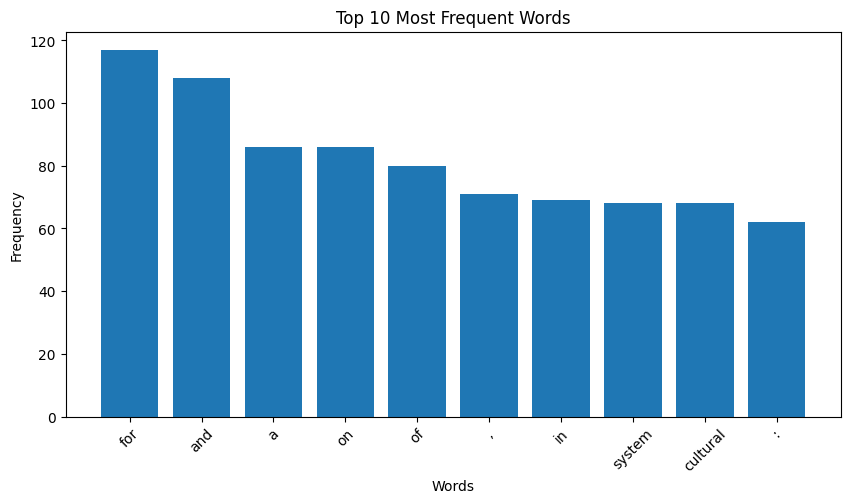

In [5]:


# Assuming 'text_column' is the column containing text data
data = pd.read_csv('./icd_marta_ana_scopus.csv')

# Tokenize the text into words for each row in the 'text_column'
data['tokenized_text'] = data['Title'].apply(lambda x: word_tokenize(str(x).lower()))

# Flatten the list of tokenized words for all rows
all_words = [word for tokens in data['tokenized_text'] for word in tokens]

# Count the frequency of each word
word_freq = Counter(all_words)

# Prepare data for plotting
labels, values = zip(*word_freq.items())

# Sort the values in descending order
indSort = sorted(range(len(values)), key=lambda k: values[k], reverse=True)

# Rearrange the data
labels = [labels[i] for i in indSort]
values = [values[i] for i in indSort]

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(labels[:10], values[:10])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()



Since the top 10 most frequent words are stop words, and we can't retrieve valuable information from it they must be deleted.

In [6]:
# Concatenate all text data from all columns
all_text = ' '.join(data.astype(str).values.flatten())

### Character Frequency Distribution

Visualizing the data can provide additional insights. Let's create a simple word frequency distribution

/home/marta/Desktop/project-icd/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24212 (\N{CJK UNIFIED IDEOGRAPH-5E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/Desktop/project-icd/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWar

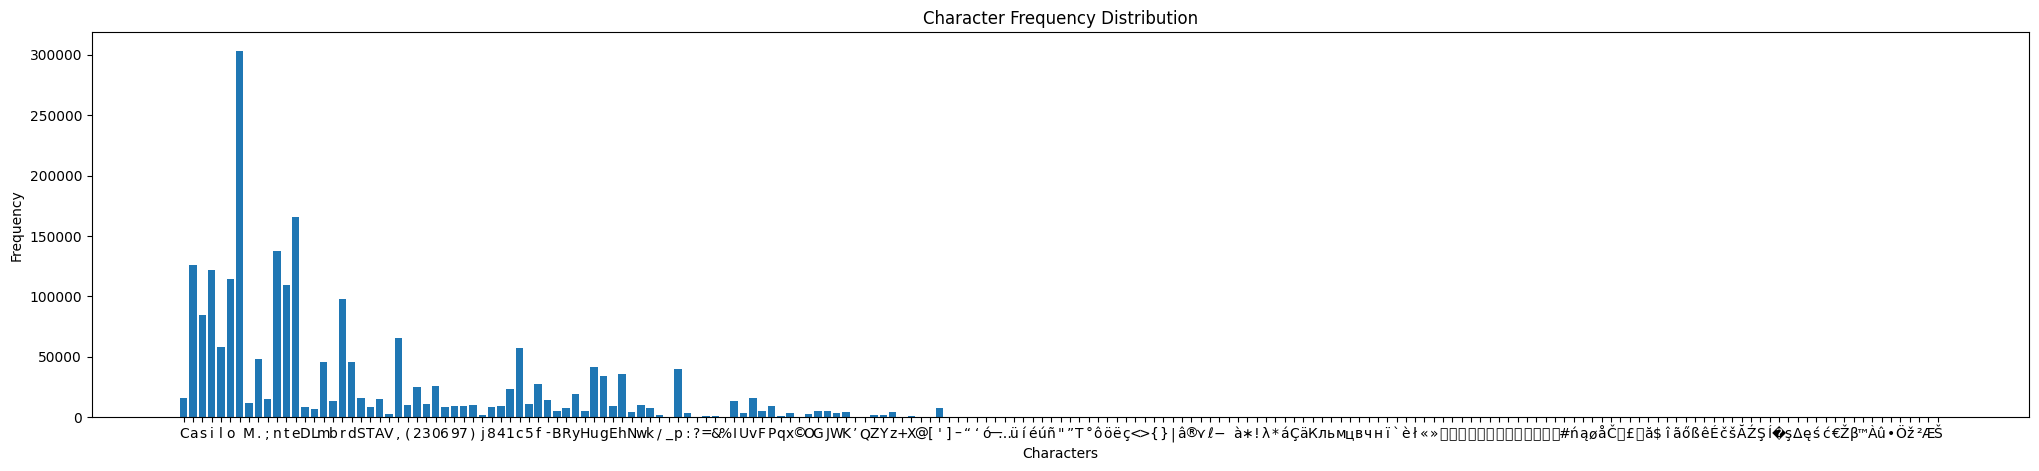

In [7]:
%matplotlib inline



# Calculate the average word length
total_characters = sum(len(word) for word in all_text.split())
total_words = len(all_text.split())

# Count the frequency of each character
char_freq = Counter(all_text)

# Prepare data for plotting
char_labels, char_values = zip(*char_freq.items())

# Create the plot with a specified font
plt.figure(figsize=(25, 5))
plt.bar(char_labels, char_values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.show()



With this graph we verified the existence of special characters and pontuation

### Number of Stopwords
The code snippet calculates the number of stopwords in the given sample text. Stopwords are commonly used words that are generally ignored in text data analysis.


In [8]:


# Get stopwords for the English language
stop_words = set(stopwords.words('english'))

# Count the number of stopwords in the entire dataset
num_stopwords = len([word for word in all_text.lower().split() if word in stop_words])

# Print or use the result as needed
print(f"Number of stopwords in the entire dataset: {num_stopwords}")

Number of stopwords in the entire dataset: 51098


### Number of Special Characters
The code snippet calculates the number of special characters (like punctuation marks) in the given sample text.

In [9]:
import string


# Count the number of special characters in the entire dataset
num_special_characters = len([char for char in all_text if char in string.punctuation])

# Print or use the result as needed
print(f"Number of special characters in the entire dataset: {num_special_characters}")

Number of special characters in the entire dataset: 181148


### Number of Uppercase Words
The code snippet calculates the number of words that are entirely in uppercase in the given sample text.

In [10]:

# Count the number of uppercase words in the entire dataset
num_uppercase_words = len([word for word in all_text.split() if word.isupper()])

# Print or use the result as needed
print(f"Number of uppercase words in the entire dataset: {num_uppercase_words}")

Number of uppercase words in the entire dataset: 36547


### Average Word Length
The code snippet calculates the average length of words in the given sample text.


In [11]:

# Function to calculate average word length for a given column
def calculate_avg_word_length(column_data):
    total_characters = sum(len(word) for text in column_data.astype(str) for word in text.split())
    total_words = sum(len(text.split()) for text in column_data.astype(str))
    return total_characters / total_words if total_words != 0 else 0

# Calculate average word length for each column
avg_word_lengths = {}

for column in data.columns:
    if data[column].dtype == 'O':  # Check if the column contains object (text) data
        avg_word_lengths[column] = calculate_avg_word_length(data[column])

# Print or use the results as needed
for column, avg_length in avg_word_lengths.items():
    print(f"Average word length for {column}: {avg_length}")

Average word length for Authors: 4.991277578245254
Average word length for Author full names: 8.905427905427905
Average word length for Author(s) ID: 11.226299694189603
Average word length for Title: 6.80456129236617
Average word length for Source title: 6.756379585326954
Average word length for Volume: 3.270186335403727
Average word length for Issue: 2.5689655172413794
Average word length for Art. No.: 3.7421602787456445
Average word length for Page start: 2.8989547038327528
Average word length for Page end: 2.9686411149825784
Average word length for DOI: 20.37630662020906
Average word length for Link: 138.41811846689896
Average word length for Affiliations: 6.886363636363637
Average word length for Authors with affiliations: 6.612766663899726
Average word length for Abstract: 5.882441331972915
Average word length for Author Keywords: 8.34655722754218
Average word length for Index Keywords: 8.525868440502586
Average word length for Funding Details: 6.864496593489781
Average word lengt

### Word Cloud

A word cloud can give us a visual representation of the most frequent words in the text.

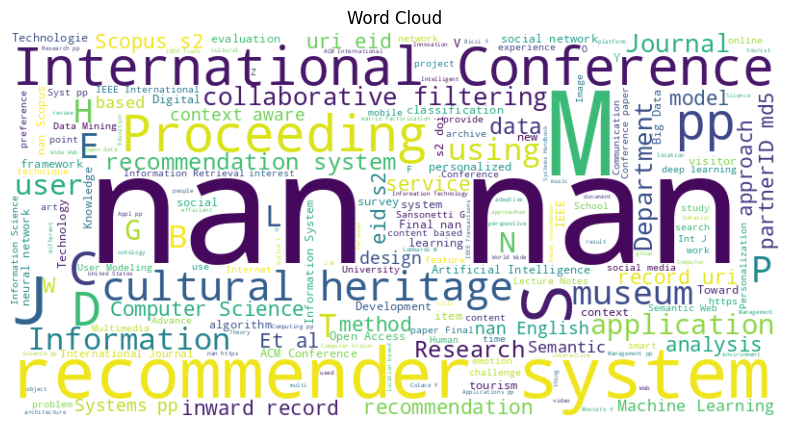

In [12]:
from wordcloud import WordCloud

# Concatenate all text data from all columns
all_text = ' '.join(data.astype(str).values.flatten())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In here we can see the that there are a lot of null numbers, and it's also possible to see the most frequent words

### Cheking for null values
The code snippet counts the frequency of each word in the given sample text and plots the top 10 most frequent words

In [13]:
# Checking for missing values
data.isna().sum()

Authors                           39
Author full names                 39
Author(s) ID                      39
Title                              0
Year                               0
Source title                       0
Volume                           101
Issue                            215
Art. No.                         219
Page start                        90
Page end                          90
Page count                        54
Cited by                           0
DOI                               60
Link                               0
Affiliations                      41
Authors with affiliations         41
Abstract                           0
Author Keywords                   66
Index Keywords                    84
Molecular Sequence Numbers       287
Chemicals/CAS                    287
Tradenames                       287
Manufacturers                    287
Funding Details                  191
Funding Texts                    192
References                        41
C

### Average Word Length
The code snippet calculates the average length of words in the given sample text.


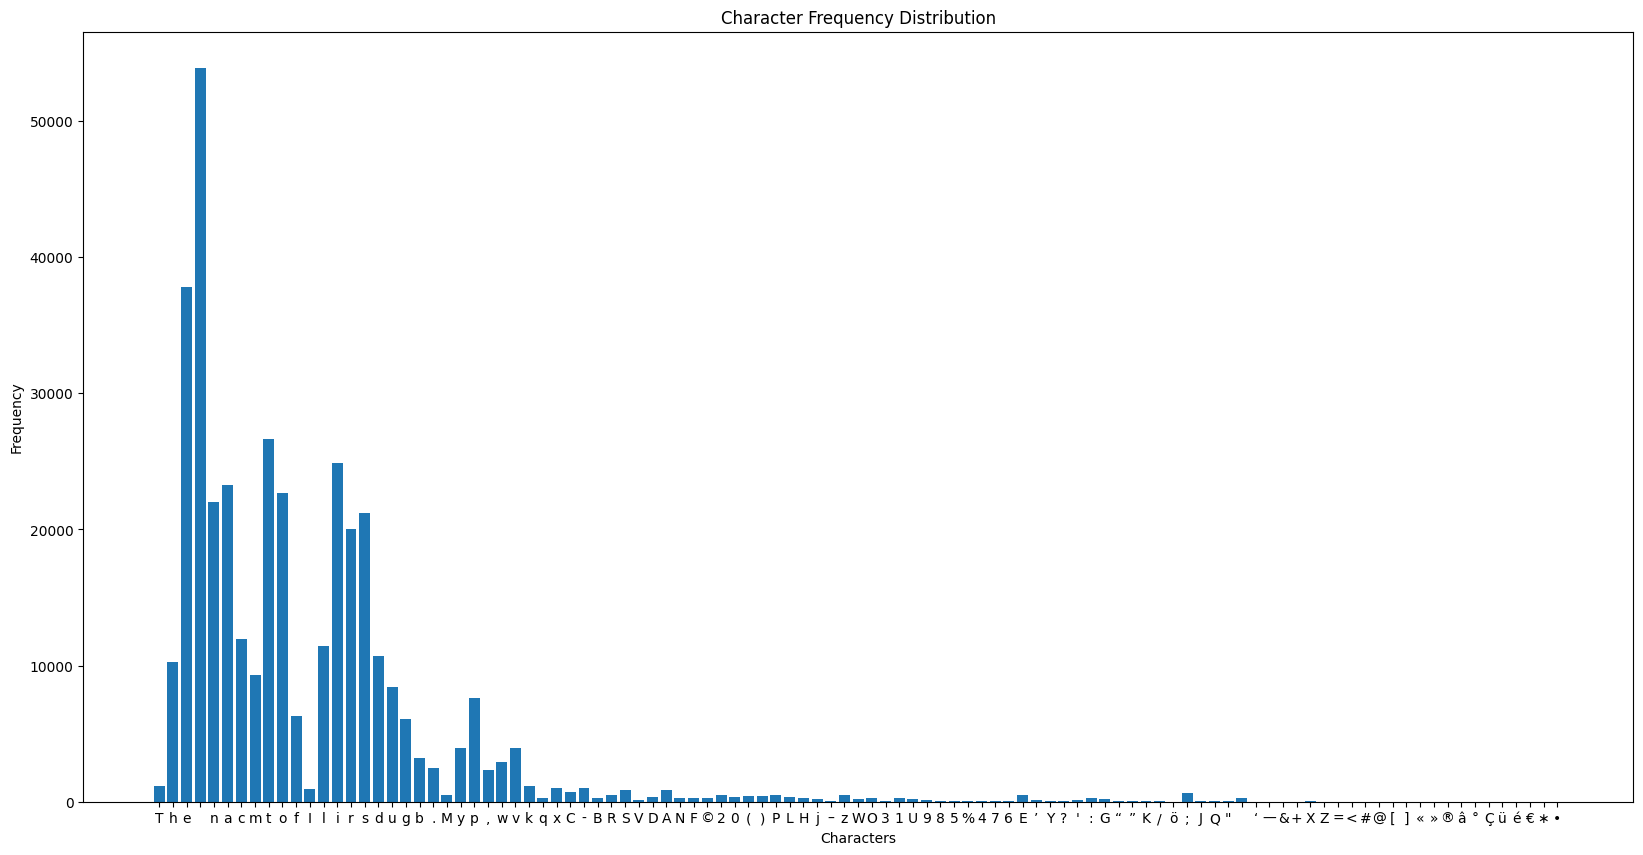

In [14]:

# Concatenate all text data in the 'text_column'
all_text = ' '.join(data['Abstract'].astype(str))

# Count the frequency of each character
char_freq = Counter(all_text)

# Prepare data for plotting
char_labels, char_values = zip(*char_freq.items())

# Create the plot
plt.figure(figsize=(20, 10))
plt.bar(char_labels, char_values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.show()


In this code we are checking if there are any special characters and pouctuation that should be remove for better results 

## **2.Noise Cleaning** 

### Remove useless columns in the context and columns with NaN values
Deleted the columns that don't have quality information for the analysis, and only bring in noise

In [15]:
columns_to_drop = ['Author full names', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by', 'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Sponsors', 'Molecular Sequence Numbers', 'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'ISBN', 'CODEN', 'PubMed ID']

data = data.drop(columns=columns_to_drop)
data.head(4)

,Authors,Author(s) ID,Title,Year,Source title,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Texts,...,Conference code,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,tokenized_text
0,Casillo M.; Conte D.; Lombardi M.; Santaniello...,23026997200; 22834021600; 57189595215; 5719787...,A Content-Based Recommender System for Hidden ...,2022,Lecture Notes in Networks and Systems,The enhancement of Italian artistic and cultur...,E-tourism; Recommender system; Singular value ...,NaN,NaN,NaN,...,265119.0,23673370,English,Lect. Notes Networks Syst.,Conference paper,Final,NaN,Scopus,2-s2.0-85118993536,"[a, content-based, recommender, system, for, h..."
1,Rani C.J.; Devarakonda N.,57870952400; 54999915100,An effectual classical dance pose estimation a...,2022,Microprocessors and Microsystems,Automatic human action recognition remains an ...,Classification; Feature extraction; Indian cla...,Computer vision; Convolution; Convolutional ne...,NaN,NaN,...,NaN,01419331,English,Microprocessors Microsyst,Article,Final,NaN,Scopus,2-s2.0-85139595586,"[an, effectual, classical, dance, pose, estima..."
2,Lilan C.; Yongsheng C.,57213686650; 6507741439,Intelligent recommendation system based on dec...,2022,Frontiers in Computational Neuroscience,"How to recruit, test, and train the intelligen...",adaptive; classification algorithm; decision m...,Classification (of information); Efficiency; A...,Special Innovation Projects for Universities i...,This work was supported by the Major Projects ...,...,NaN,16625188,English,Front. Comput. Neurosci.,Article,Final,All Open Access; Gold Open Access; Green Open ...,Scopus,2-s2.0-85142172754,"[intelligent, recommendation, system, based, o..."
3,Min H.; Yang B.; Allen D.G.; Grandey A.A.; Liu M.,57194326042; 58019611700; 57202914326; 6603322...,Wisdom from the crowd: Can recommender systems...,2022,Personnel Psychology,Can algorithms that predict customer movie and...,Machine learning; Retention; Turnover; Work At...,NaN,NaN,NaN,...,NaN,00315826,English,Pers. Psychol.,Article,Article in press,NaN,Scopus,2-s2.0-85144128378,"[wisdom, from, the, crowd, :, can, recommender..."


## **2.1. Preprocess the dataset**


In [16]:


# Function to perform text preprocessing
def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # 1. Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'º', '', text)  # Remove the "º" character
        text = ' '.join(text.split())  # Remove extra spaces

        # 2. Convert the text to lowercase
        text = text.lower()
        
        # 4. Tokenization (dividing the text to a list of words ex: 'a ana e linda ' -> ['a', 'ana', 'e' ,'linda'] )
        words = word_tokenize(text)

        
        # 5. Stopword Removal (remove very common words like 'the', 'a' etc.)
        stop_words = set(stopwords.words('english'))
        # In here he is removing the stop words from the text 
        words = [word for word in words if word.lower() not in stop_words]


        # Rare words removal
        # Rare words removal
        # rare_words = [word for word, count in Counter(words).items() if count == 1]
        # words = ' '.join([word for word in words if word not in rare_words])

        

        # # Remove words that are shorter than or equal to 2 characters
        # words = ' '.join([word for word in words.split() if len(word) > 2])
        
    
        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
        

        
        # 5. Stemming(reduse the words to their root form ex 'running' -> 'run')
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
        
        # Join the processed words back into a sentence
        processed_text = ' '.join(words)
        
        return processed_text
    else:
        # Return an empty string for non-string values
        return ''
    

#create a list with all the text cloumns 
text_columns = data.select_dtypes(include='object').columns.tolist()

# Apply text preprocessing to specified text columns
for col in text_columns:
    data[col] = data[col].apply(preprocess_text)
# Drop duplicate rows based on the entire row
data = data.drop_duplicates()

# Display the updated DataFrame
data.head()


,Authors,Author(s) ID,Title,Year,Source title,Abstract,Author Keywords,Index Keywords,Funding Details,Funding Texts,...,Conference code,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID,tokenized_text
0,casillo cont lombardi santaniello troiano vale...,,contentbas recommend system hidden cultur heri...,2022,lectur note network system,enhanc italian artist cultur heritag big chall...,etour recommend system singular valu decomposit,,,,...,265119.0,,english,lect note network syst,confer paper,final,,scopu,,
1,rani cj devarakonda n,,effectu classic danc pose estim classif system...,2022,microprocessor microsystem,automat human action recognit remain intric is...,classif featur extract indian classic danc pos...,comput vision convolut convolut neural network...,,,...,NaN,,english,microprocessor microsyst,articl,final,,scopu,,
2,lilan c yongsheng c,,intellig recommend system base decis model arc...,2022,frontier comput neurosci,recruit test train intellig recommend system u...,adapt classif algorithm decis model intellig r...,classif inform effici adapt classif algorithm ...,special innov project univers guangdong wtscx ...,work support major project nation social scien...,...,NaN,,english,front comput neurosci,articl,final,open access gold open access green open access,scopu,,
3,min h yang b allen dg grandey aa liu,,wisdom crowd recommend system predict employe ...,2022,personnel psycholog,algorithm predict custom movi shop prefer also...,machin learn retent turnov work attitud,,,,...,NaN,,english,per psychol,articl,articl press,,scopu,,
4,dahroug vlachidi liapi bikaki lópeznor sacco p...,,use date contextu inform personalis cultur her...,2021,journal inform scienc,present semanticsbas mechan aim promot reflect...,annual commemor context awar cultur heritag hi...,recommend system semant annual commemor contex...,european union horizon research innov program ...,fund text author disclos receipt follow financ...,...,NaN,,english,j inf sci,articl,final,open access green open access,scopu,,


## **4.Advanced Text Processing**

## Bag of Words


In [17]:
column_to_vectorize = 'Abstract'

# Extract text data from the specified column
text_data = data[column_to_vectorize].tolist()

# Initialize the CountVectorizer with 1-grams
vectorizer = CountVectorizer(ngram_range=(1, 1))

# Fit and transform the text data
X = vectorizer.fit_transform(text_data)

# Convert the result to a DataFrame for better visualization
vectorized_data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("Bag of Words:", X.toarray())
# Display the vectorized data
print(vectorized_data.head(4))




Bag of Words: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
   aalp  aat  abil  abl  absolut  absorb  abstract  abund  abus  academ  ...  \
0     0    0     0    1        0       0         0      0     0       0  ...   
1     0    0     0    0        0       0         0      0     0       0  ...   
2     0    0     0    0        0       0         0      0     0       0  ...   
3     0    0     0    0        0       0         0      0     0       0  ...   

   youth  youtub  youv  zaragoza  zbmath  zernik  zeroshot  zhang  zontal  \
0      0       0     0         0       0       0         0      0       0   
1      0       0     0         0       0       0         0      0       0   
2      0       0     0         0       0       0         0      0       0   
3      0       0     0         0       0       0         0      0       0   

   çatalhöyük  
0           0  
1           0  
2           0  
3           0  

In [18]:
# Generate the heatmap
plt.figure(figsize=(20, 1))  # Adjust the figure size
sns.heatmap(vectorized_data, annot=True, cmap="YlGnBu", cbar=False)

plt.show()

KeyboardInterrupt: 

In [511]:
document = data['Title']
document

0      contentbas recommend system hidden cultur heri...
1      effectu classic danc pose estim classif system...
2      intellig recommend system base decis model arc...
3      wisdom crowd recommend system predict employe ...
4      use date contextu inform personalis cultur her...
                             ...                        
282    studi individu mobil pattern base individu fam...
283                     museum app trigger user reection
284    appli implicit recommend system prepar visit c...
285    recommend sequenc point interest group user mo...
286    similar metric social network analysi content ...
Name: Title, Length: 287, dtype: object

In [512]:
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

def preprocess_data(documents):
    
    
    # Tokenize the documents and remove stopwords
    texts = [[word for word in simple_preprocess(str(doc))] for doc in documents]
    
    # Return the list of tokenized and preprocessed texts
    return texts


In [513]:
#create a list with all the text cloumns 
text_columns = data.select_dtypes(include='object').columns.tolist()
texts = []
# Apply text preprocessing to specified text columns
for col in text_columns:
    texts.append(preprocess_data(data[str(col)]))
# Drop duplicate rows based on the entire row




# Process the documents using the previously defined preprocessing function
#processed_texts = preprocess_data(data)
#processed_texts
#print(processed_texts)

In [515]:
processed_texts = [inner_list[0] for inner_list in texts]

print(processed_texts)

[['casillo', 'cont', 'lombardi', 'santaniello', 'troiano', 'valentino'], ['casillo', 'mario', 'cont', 'dajana', 'lombardi', 'marco', 'santaniello', 'domenico', 'troiano', 'alfredo', 'valentino', 'carmin'], [], ['contentbas', 'recommend', 'system', 'hidden', 'cultur', 'heritag', 'site', 'enhanc'], ['lectur', 'note', 'network', 'system'], [], [], [], [], [], [], ['doi', 'partnerid', 'md', 'be', 'ecc', 'bae'], ['diin', 'univers', 'salenro', 'fisciano', 'itali', 'dipmat', 'univers', 'salenro', 'fisciano', 'itali', 'netcom', 'engin', 'napl', 'na', 'itali'], ['casillo', 'diin', 'univers', 'salenro', 'fisciano', 'itali', 'cont', 'dipmat', 'univers', 'salenro', 'fisciano', 'itali', 'lombardi', 'diin', 'univers', 'salenro', 'fisciano', 'itali', 'santaniello', 'diin', 'univers', 'salenro', 'fisciano', 'itali', 'troiano', 'netcom', 'engin', 'napl', 'na', 'itali', 'valentino', 'diin', 'univers', 'salenro', 'fisciano', 'itali', 'dipmat', 'univers', 'salenro', 'fisciano', 'itali'], ['enhanc', 'itali

In [517]:
from gensim import corpora
# Create Dictionary
id2word = corpora.Dictionary(processed_texts)

In [518]:
# Create Corpus
texts = processed_texts
texts

[['casillo', 'cont', 'lombardi', 'santaniello', 'troiano', 'valentino'],
 ['casillo',
  'mario',
  'cont',
  'dajana',
  'lombardi',
  'marco',
  'santaniello',
  'domenico',
  'troiano',
  'alfredo',
  'valentino',
  'carmin'],
 [],
 ['contentbas',
  'recommend',
  'system',
  'hidden',
  'cultur',
  'heritag',
  'site',
  'enhanc'],
 ['lectur', 'note', 'network', 'system'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['doi', 'partnerid', 'md', 'be', 'ecc', 'bae'],
 ['diin',
  'univers',
  'salenro',
  'fisciano',
  'itali',
  'dipmat',
  'univers',
  'salenro',
  'fisciano',
  'itali',
  'netcom',
  'engin',
  'napl',
  'na',
  'itali'],
 ['casillo',
  'diin',
  'univers',
  'salenro',
  'fisciano',
  'itali',
  'cont',
  'dipmat',
  'univers',
  'salenro',
  'fisciano',
  'itali',
  'lombardi',
  'diin',
  'univers',
  'salenro',
  'fisciano',
  'itali',
  'santaniello',
  'diin',
  'univers',
  'salenro',
  'fisciano',
  'itali',
  'troiano',
  'netcom',
  'engin',
  'napl',
  'na',
  'itali',


In [519]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [520]:
from gensim.models.ldamodel import LdaModel
# Set number of topics
num_topics = 20

lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=100, alpha=1.0, eta=0.001, per_word_topics=True)


In [521]:
# Print the keywords for each topic
print(lda_model.print_topics())

[(0, '0.003*"itali" + 0.003*"system" + 0.003*"recommend" + 0.003*"salenro" + 0.003*"pp" + 0.003*"note" + 0.003*"santaniello" + 0.003*"lombardi" + 0.003*"univers" + 0.003*"fisciano"'), (1, '0.056*"pp" + 0.041*"system" + 0.034*"recommend" + 0.025*"intern" + 0.017*"confer" + 0.014*"colac" + 0.014*"comput" + 0.014*"syst" + 0.011*"context" + 0.011*"santo"'), (2, '0.850*"contentbas" + 0.000*"itali" + 0.000*"system" + 0.000*"recommend" + 0.000*"salenro" + 0.000*"fisciano" + 0.000*"santaniello" + 0.000*"cultur" + 0.000*"troiano" + 0.000*"pp"'), (3, '0.003*"system" + 0.003*"recommend" + 0.003*"pp" + 0.003*"syst" + 0.003*"intern" + 0.003*"confer" + 0.003*"fisciano" + 0.003*"itali" + 0.003*"technolog" + 0.003*"lombardi"'), (4, '0.003*"system" + 0.003*"recommend" + 0.003*"pp" + 0.003*"univers" + 0.003*"syst" + 0.003*"fisciano" + 0.003*"intern" + 0.003*"itali" + 0.003*"lombardi" + 0.003*"confer"'), (5, '0.003*"itali" + 0.003*"univers" + 0.003*"recommend" + 0.003*"system" + 0.003*"salenro" + 0.003*"

In [522]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 0.364634603353407


In [368]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [369]:
from gensim.corpora import Dictionary

# Assuming 'processed_texts' is your list of tokenized and preprocessed documents
dictionary = Dictionary(processed_texts)


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

TypeError: drop() takes from 1 to 2 positional arguments but 3 were given